This file will specify model implementations on US Census 1990 data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read US census csv
us_census = pd.read_csv("/Users/jenniferzhang/Desktop/Research with Will/USCensus1990.data.txt", delimiter=",")

# Check length and iFertil
# print(us_census.shape)
# print(us_census['iFertil'].head(10))

## R Learner

In [3]:
from Model.rlearner import RLearner
from Data.proc_us_census import preprocess_data

In [15]:
# nX: user features
# w: T (whether user is treated or not)
# values: dIncome1 (reward)
# cost: iFertil (positive cost)
nX_tr, nX_va, nX_te, w_tr, w_va, w_te, values_tr, values_va, values_te, cost_tr, cost_va, cost_te = preprocess_data('/Users/jenniferzhang/Desktop/Research with Will/USCensus1990.data.txt')
# Check length
print(nX_tr.shape) # (135486, 46)
print(w_tr.shape) # (135486,)
# print(len(nX_tr) + len(nX_va) + len(nX_te))
print(nX_va.shape)

/Users/jenniferzhang/Desktop/Research with Will/HCL/Data/proc_us_census.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D[l][pd.isnull(D[l])] = 0.0
/Users/jenniferzhang/Desktop/Research with Will/HCL/Data/proc_us_census.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D[l][pd.isnull(D[l])] = 0.0
/Users/jenniferzhang/Desktop/Research with Will/HCL/Data/proc_us_census.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D[l][pd.

(135486, 46)
(135486,)
(45162, 46)


In [14]:
# get treated and untreated data
treat_index = np.where(w_tr==0)[0]
treat_nX_tr = nX_tr[treat_index]
untreat_nX_tr = nX_tr[~treat_index]

## Visualization

In [15]:
from Visualization.experimentation import Experiment
from matplotlib import pyplot as plt
from utils.linearHTE import linearHTE

In [ ]:
l_hte = linearHTE()
value_tao, cost_tao = l_hte.fit_rlearner(nX_tr, values_tr, cost_tr, w_tr)

# Prediction
print(value_tao.predict(nX_va))
print(cost_tao.predict(nX_va))

<class 'numpy.ndarray'>
[-0.01692612  0.0147541   0.10161032 ... -0.06869107 -0.02738642
  0.02166455]
[ 0.09076221 -0.10321334 -0.07419134 ...  0.16533018  0.03769526
 -0.08224887]


Average Treatment Effect of a cohort: 

ex. 22k people in a cohort, split between treatment and untreatment. 

(Treatment - untreatment average per user value) * 22k = incremental value

(Treatment - untreatment average per user cost) * 22k  = incremental cost

/Users/jenniferzhang/Desktop/Research with Will/HCL/Visualization/experimentation.py:54: RuntimeWarning: invalid value encountered in scalar divide
  a = a / len(values_At)
/Users/jenniferzhang/Desktop/Research with Will/HCL/Visualization/experimentation.py:55: RuntimeWarning: invalid value encountered in scalar divide
  b = b / len(values_Bt)
/Users/jenniferzhang/Desktop/Research with Will/HCL/Visualization/experimentation.py:56: RuntimeWarning: invalid value encountered in scalar divide
  c = c / len(nis_At)
/Users/jenniferzhang/Desktop/Research with Will/HCL/Visualization/experimentation.py:57: RuntimeWarning: invalid value encountered in scalar divide
  d = d / len(nis_Bt)
/Users/jenniferzhang/Desktop/Research with Will/HCL/Visualization/experimentation.py:54: RuntimeWarning: invalid value encountered in scalar divide
  a = a / len(values_At)
/Users/jenniferzhang/Desktop/Research with Will/HCL/Visualization/experimentation.py:55: RuntimeWarning: invalid value encountered in scalar 

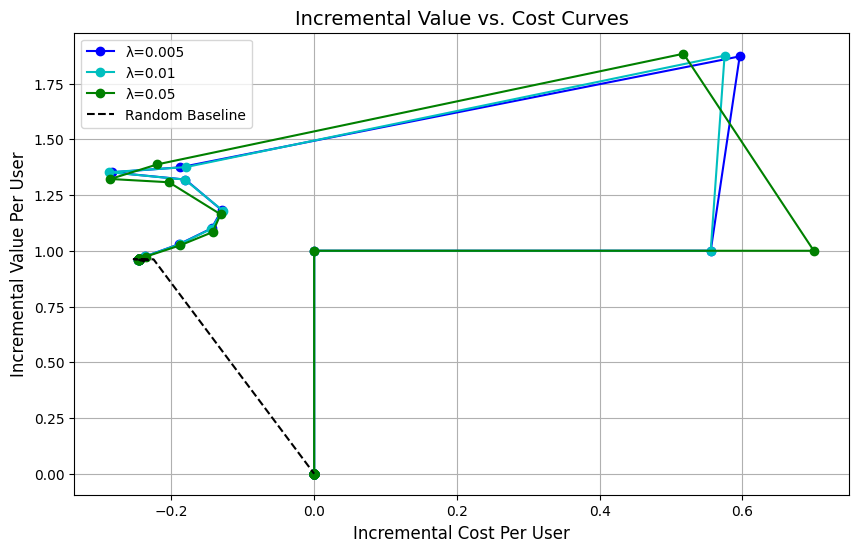

In [ ]:
ex = Experiment()

# Visualization
# Matrix: effectiveness score | incremental value | incremental cost

# aucc, percs, cpits, cpitcohorts = ex.AUC_cpit_cost_curve_deciles_cohort_vis(
    
# )